In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [5]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
X = iris.data[:, 2:] # considering only the petal length and petal width as the features
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file='iris_tree.dot',
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True)

In [9]:
%ls

images/  iris_tree.dot  sample_data/


In [10]:
!dot -Tpng iris_tree.dot -o iris_tree.png

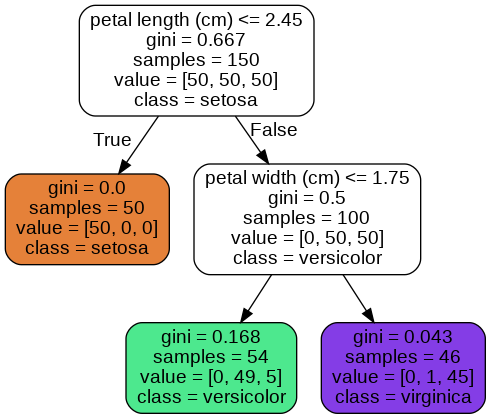

In [11]:
from IPython.display import Image
Image(filename='iris_tree.png')

In [12]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict_proba([[2.45, 1]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.predict([[5, 1.5]])

array([1])

In [15]:
tree_clf.predict_proba([[6, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [17]:
prob = tree_clf.predict_proba([[6, 1.5]])

In [18]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
prob[0][1]

0.9074074074074074

In [20]:
iris['data'].shape

(150, 4)

In [21]:
tree_clf.predict([[5, 1.5], [3, 1.5]])

array([1, 1])

In [22]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(m, 1) / 10

In [23]:
# Manual Computation
res = []
for t in X:
    yl = y[X <= t]
    yln = len(yl)
    myl = np.mean(yl)
    el = yl - myl
    msel = np.sum(el*el)
    yr = y[X> t]
    yrn = len(yr)
    myr = np.mean(yr)
    er = yr - myr
    mser = np.sum(er*er)
    cost = (msel*yln + mser*yrn) / (yln + yrn)
    res.append((t, cost))
res.sort(key=lambda t: t[1])
print(res[0])

(array([0.2517823]), 9.231695778441788)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

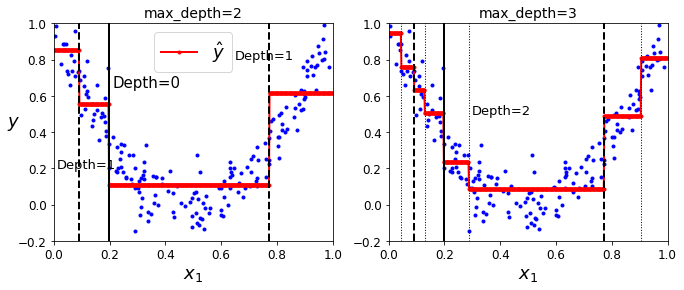

In [25]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

In [26]:
print(X[0])
print(y[0])

[0.37454012]
[-0.00504175]


In [27]:
tree_reg2.max_depth

3

In [28]:
tree_reg2.predict([[0.40]])

array([0.08445536])

In [29]:
tree_reg2.predict([[0.038]])

array([0.94697815])

In [30]:
tree_reg2.predict([[0.04]])

array([0.94697815])

In [31]:
export_graphviz(
    tree_reg2,
    out_file='tree_reg2.dot',
    rounded=True,
    filled=True)

In [32]:
!dot -Tpng tree_reg2.dot -o tree_reg2.png

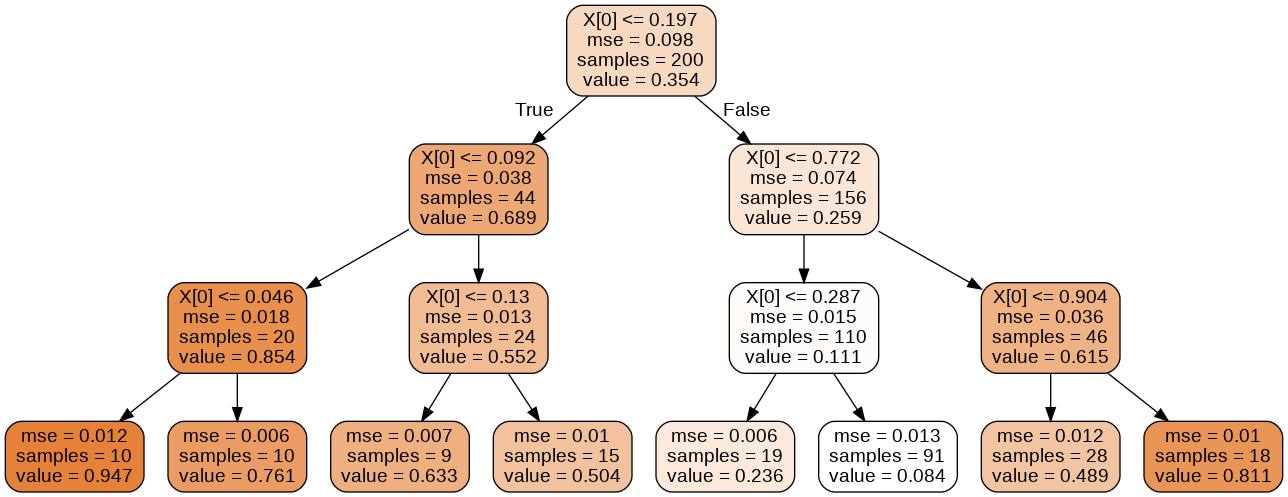

In [33]:
from IPython.display import Image
Image(filename='tree_reg2.png')

In [34]:
p = 0.7**3 + 3*0.3*0.7**2

In [35]:
p

0.7839999999999998